Beantworten Sie folgende Fragen:

---

a) Was ist eine Kante und wie ist sie im Bild, in dessen Ableitung erkennbar?
Im Bild ist es ein Übergang in der Helligkeit. 
In der Ableitung ist es die Stelle mit lokal größter Steigung.
Die Kante verläuft orthogonal zum Gradienten. 
    
b) Was sind die partiellen Ableitungen eines Bildes? Was sagen sie aus?
Die Steigung in x und y Richtung.

c) Was ist der Gradientenvektor (kurz: Gradient) eines Bildes?
Er gibt die Richtung und Stärke des stärksten Anstiegs von Helligkeiten an einem Pixel an.
d) Wie kann die Kantenst¨arke berechnet werden?
$$E(u, v) = \sqrt{ D_{ x }^2 + D_{ y }^2 }$$
e) Wie kann die lokale Kantenrichtung berechnet werden?
$$\Phi(u, v) = \arctan(\frac{D_{y}}{D_{x}})$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import time
import my_lib



In [16]:
def rgb_2_gray(img, mode='lut'):
    if mode == 'lut':
        return np.array(np.round(img[:,:,0] * 0.2126 + img[:,:,1] * 0.7152 + img[:,:,2] * 0.0722), dtype=np.uint8)
    else:
        return np.array(np.round(img[:,:,0] * 0.2126 + img[:,:,1] * 0.587 + img[:,:,2] * 0.114), dtype=np.uint8)
    


In [50]:

def sobel(img, filter):
    # TODO: implement sobel filtering e.g. with 4 foor loops
    if len(filter) != 3 or len(filter[0]) != 3:
        print("invalid Filter")
        return
    
    if len(np.shape(img)) == 3:
        gray = rgb_2_gray(img)
    else:
        gray = img
    
    filtered_img = np.zeros((gray.shape[0]-2, gray.shape[1]-2), dtype=np.float64)

    for i in range(1, len(filtered_img)):
        for j in range(1, len(filtered_img[0])):
            
            for k in range(i - 1, i + 2):
                for l in range(j - 1, j + 2):
                    filtered_img[i][j] += int(gray[k][l]) * filter[k - i + 1][l - j + 1]
            #filtered_img[i][j] /= 8
    return filtered_img

In [51]:
def sep_sobel(img, filter):
    if len(np.shape(img)) == 3:
        gray = rgb_2_gray(img)
    else:
        gray = img
    filter1, filter2 = filter

    filtered_img = np.zeros((gray.shape[0] - 2, gray.shape[1]), dtype=np.float64)
    
    for i in range(1, len(gray) - 1):
        for j in range(len(gray[0])):
            
            for k in range(i - 1, i + 2):
                filtered_img[i - 1][j] += int(gray[k][j]) * filter1[k - i + 1]
    filtered_img2 = np.zeros((gray.shape[0] - 2, gray.shape[1] - 2), dtype=np.float64)
    for i in range(len(filtered_img)):
        for j in range(1, len(gray[0]) - 1):
            
            for l in range(j - 1, j + 2):
                filtered_img2[i][j - 1] += int(filtered_img[i][l]) * filter2[l - j + 1]
    #filtered_img2 /= 8
            
    return filtered_img2
    

In [52]:
img = io.imread("lena.jpg")
gray = rgb_2_gray(img)

height, width = gray.shape

# TODO: define filter in x in y direction
filter_x = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]

filter_y = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]


start = time.time()
# TODO: filter image in x direction (sobel(gray, filter_x))
sobel_x = sobel(gray, filter_x)
end = time.time()
duration = end-start
print("Duration in milliseconds: ", duration*1000)

start = time.time()
# TODO: filter image in y direction (sobel(gray, filter_y))
sobel_y = sobel(gray, filter_y)
end = time.time()
duration = end-start
print("Duration in milliseconds: ", duration*1000)


# TODO compute Gradient magnitude

Duration in milliseconds:  5313.688039779663
Duration in milliseconds:  6430.481195449829


In [53]:
def gradient_magnitude(img_x, img_y):
    return np.array(np.sqrt(img_x**2 + img_y**2), dtype=np.uint8)

In [56]:
img = io.imread("lena.jpg")
gray = rgb_2_gray(img)

height, width = gray.shape

# TODO: define filter in x in y direction
sep_filter_x = ([1, 2, 1], [1, 0, -1])

sep_filter_y = ([1, 0, -1], [1, 2, 1])


start = time.time()
# TODO: filter image in x direction (sobel(gray, filter_x))
sobel_x_sep = sep_sobel(gray, sep_filter_x)
end = time.time()
duration = end-start
print("Duration in milliseconds: ", duration*1000)

start = time.time()
# TODO: filter image in y direction (sobel(gray, filter_y))
sobel_y_sep = sep_sobel(gray, sep_filter_y)
end = time.time()
duration = end-start
print("Duration in milliseconds: ", duration*1000)


# TODO compute Gradient magnitude

Duration in milliseconds:  3572.6373195648193
Duration in milliseconds:  3192.0111179351807


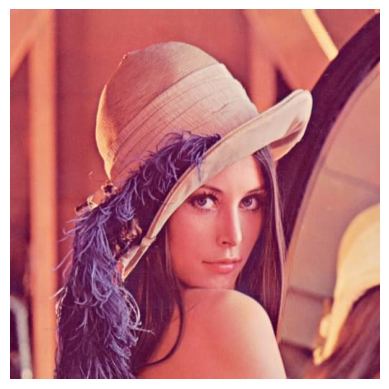

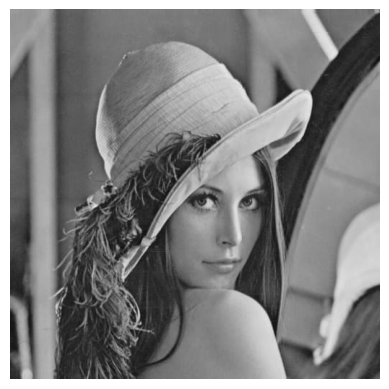

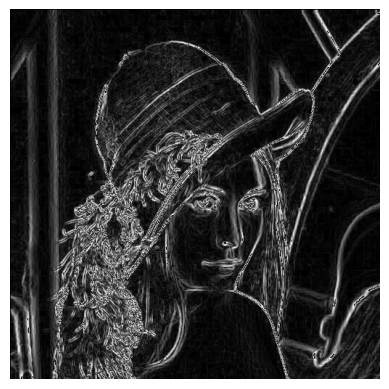

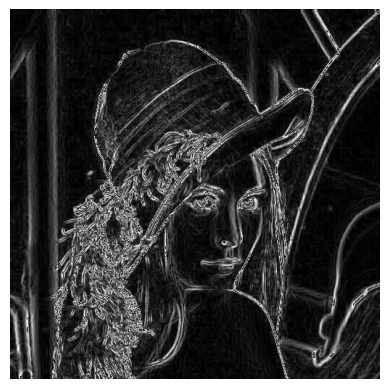

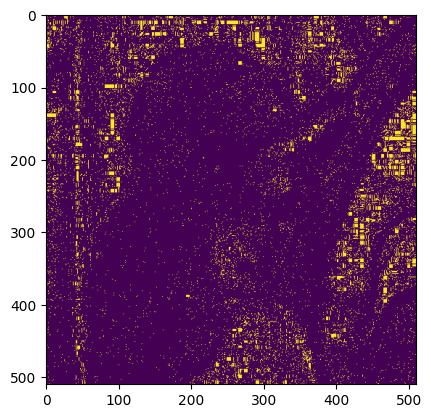

In [57]:
sobel_xy = gradient_magnitude(sobel_x, sobel_y)
io.imsave("lena.jpeg", sobel_xy)

sobel_xy_sep = gradient_magnitude(sobel_x_sep, sobel_y_sep)
io.imsave("lena_sep.jpeg", sobel_xy_sep)
my_lib.plot_img(img, False)
my_lib.plot_img(gray, True)
my_lib.plot_img(sobel_xy, True)
my_lib.plot_img(sobel_xy_sep, True)

plt.imshow(sobel_xy == sobel_xy_sep)

In [42]:
import sobel_demo as nd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import time


def rgb_2_gray(img, mode='lut'):
    if mode == 'lut':
        return np.round(img[:,:,0] * 0.2126 + img[:,:,1] * 0.7152 + img[:,:,2] * 0.0722)
    else:
        return np.round(img[:,:,0] * 0.2126 + img[:,:,1] * 0.587 + img[:,:,2] * 0.114)


img = io.imread("lena.jpg")
gray = rgb_2_gray(img).astype("float64")
# TODO: define filters in x in y direction

start = time.time()
# TODO: filter image in x direction (nd.sobel(gray, filter_x))
sobel_x_cpp = nd.sobel(gray, True)
end = time.time()
duration = end-start
print("Duration in milliseconds: ", duration*1000)


start = time.time()
# TODO: filter image in y direction (nd.sobel(gray, filter_y))
sobel_y_cpp = nd.sobel(gray, False)
end = time.time()
duration = end-start
print("Duration in milliseconds: ", duration*1000)

# TODO compute Gradient magnitude
def gradient_magnitude2(img_x, img_y):
    return np.array(np.sqrt(img_x * img_x + img_y * img_y), dtype=np.uint8)

Duration in milliseconds:  15.908241271972656
Duration in milliseconds:  27.48727798461914


In [37]:
def gradient_magnitude2(img_x, img_y):
    return np.array(np.sqrt(img_x * img_x + img_y * img_y), dtype=np.uint8)

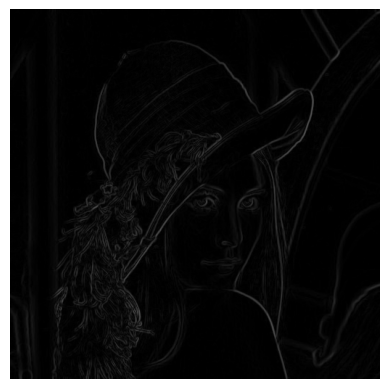

In [34]:
sobel_xy_cpp = gradient_magnitude2(sobel_x_cpp, sobel_y_cpp)
my_lib.plot_img(sobel_xy_cpp, True)
io.imsave("lena_cpp.jpeg", sobel_xy_cpp)

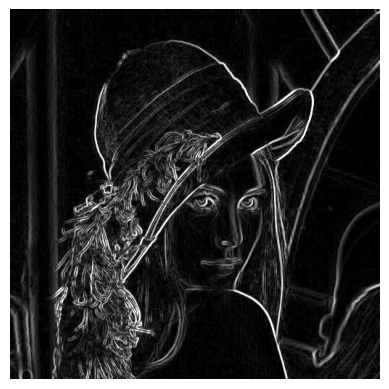

In [35]:
scale = 5
nicer = [[255 if int(y) * scale > 255 else int(y) * scale for y in x] for x in sobel_xy_cpp]
my_lib.plot_img(nicer, True)